In [1]:
# std
import os
import sys
import inspect
import time
import pathlib
from math import sqrt
from math import log2
# packgaes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

# packages
from matplotlib.colors import ListedColormap

## sklearn
from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2

from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import median_absolute_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



# for selection the right path
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from common.model_trainer_reg import *

from GD.LinearRegression import LinearRegression
from KNN.KNNRegressor import KNNRegressor

In [43]:
# Custom functions

module_path = pathlib.Path(os.getcwd()).parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
print(sys.path)

from common.dataset_grabber import get_data_path

['/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Metro', '', '/home/alexander/ngsuite/ngsolve-install/lib/python3/dist-packages', '/home/alexander/ngsuite/ngsolve-install/bin', '/home/alexander/.local/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.392013122/pythonFiles', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.392013122/pythonFiles/lib/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/home/alexander/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '

In [44]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    plt.grid()
    return plt

In [45]:
def plot_learning_curve_test(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)

    display(train_sizes[1])



    # Plot learning curve
    plt.plot(train_sizes[0],train_sizes[1][1], 'o-', color="r",
                 label="Training score")
    '''
    plt.plot(train_sizes, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt
    '''

In [46]:
def plot_learning_curve_own(y,model,ylim = None):
    if ylim:
        plt.ylim(*ylim)
    plt.xlabel("number of splits")
    plt.ylabel("score")
    plt.grid()
    plt.plot(y,marker = "o",label="Training score"+model)
    plt.legend()

In [47]:
datapath = get_data_path("Metro", "Metro_Interstate_Traffic_Volume.csv")
display(datapath)

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Datasets/Metro/Metro_Interstate_Traffic_Volume.csv')

In [69]:
df_raw = pd.read_csv(datapath)

df_raw
#df_raw = df_raw.sample(3000)

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0        None  288.28      0.0      0.0          40        Clouds   
1        None  289.36      0.0      0.0          75        Clouds   
2        None  289.58      0.0      0.0          90        Clouds   
3        None  290.13      0.0      0.0          90        Clouds   
4        None  291.14      0.0      0.0          75        Clouds   
...       ...     ...      ...      ...         ...           ...   
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
0            scattered clouds  2012-10-02 09:00:00            5545  
1               broken clouds  2012-10-02 10:00:00            4516  
2             overcast clouds  2012-10-02 11:00:00            4767  
3             overcast clouds  2012-10-02 12:00:00            5026  
4               broken clouds  2012-10-02 13:00:00            4918  
...                       ...                  ...             ...  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  

[48204 rows x 9 columns]

# Dataset preparation

In [70]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# different holiday

In [71]:
df_raw

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0        None  288.28      0.0      0.0          40        Clouds   
1        None  289.36      0.0      0.0          75        Clouds   
2        None  289.58      0.0      0.0          90        Clouds   
3        None  290.13      0.0      0.0          90        Clouds   
4        None  291.14      0.0      0.0          75        Clouds   
...       ...     ...      ...      ...         ...           ...   
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
0            scattered clouds  2012-10-02 09:00:00            5545  
1               broken clouds  2012-10-02 10:00:00            4516  
2             overcast clouds  2012-10-02 11:00:00            4767  
3             overcast clouds  2012-10-02 12:00:00            5026  
4               broken clouds  2012-10-02 13:00:00            4918  
...                       ...                  ...             ...  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  

[48204 rows x 9 columns]

In [72]:
holiday_list = df_raw.holiday.unique()
holiday_list

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [73]:
for l in holiday_list:
    if l == "None":
        df_raw = df_raw.replace(l,0)
for l in holiday_list:
    if l != "None":
        df_raw = df_raw.replace(l,1)

In [74]:
df_raw


holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0            0  288.28      0.0      0.0          40        Clouds   
1            0  289.36      0.0      0.0          75        Clouds   
2            0  289.58      0.0      0.0          90        Clouds   
3            0  290.13      0.0      0.0          90        Clouds   
4            0  291.14      0.0      0.0          75        Clouds   
...        ...     ...      ...      ...         ...           ...   
48199        0  283.45      0.0      0.0          75        Clouds   
48200        0  282.76      0.0      0.0          90        Clouds   
48201        0  282.73      0.0      0.0          90  Thunderstorm   
48202        0  282.09      0.0      0.0          90        Clouds   
48203        0  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
0            scattered clouds  2012-10-02 09:00:00            5545  
1               broken clouds  2012-10-02 10:00:00            4516  
2             overcast clouds  2012-10-02 11:00:00            4767  
3             overcast clouds  2012-10-02 12:00:00            5026  
4               broken clouds  2012-10-02 13:00:00            4918  
...                       ...                  ...             ...  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  

[48204 rows x 9 columns]

In [75]:
holiday_list = df_raw.holiday.unique()
holiday_list

array([0, 1])

In [76]:
indexNames = df_raw.index[df_raw.holiday == 1]
df_raw.drop(indexNames , inplace=True)

In [77]:
df_raw

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0            0  288.28      0.0      0.0          40        Clouds   
1            0  289.36      0.0      0.0          75        Clouds   
2            0  289.58      0.0      0.0          90        Clouds   
3            0  290.13      0.0      0.0          90        Clouds   
4            0  291.14      0.0      0.0          75        Clouds   
...        ...     ...      ...      ...         ...           ...   
48199        0  283.45      0.0      0.0          75        Clouds   
48200        0  282.76      0.0      0.0          90        Clouds   
48201        0  282.73      0.0      0.0          90  Thunderstorm   
48202        0  282.09      0.0      0.0          90        Clouds   
48203        0  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
0            scattered clouds  2012-10-02 09:00:00            5545  
1               broken clouds  2012-10-02 10:00:00            4516  
2             overcast clouds  2012-10-02 11:00:00            4767  
3             overcast clouds  2012-10-02 12:00:00            5026  
4               broken clouds  2012-10-02 13:00:00            4918  
...                       ...                  ...             ...  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  

[48143 rows x 9 columns]

# handling the outlayers
## some distributions

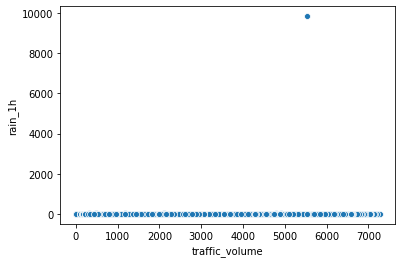

In [80]:
sns.scatterplot(data=df_raw, x="traffic_volume",y="rain_1h")

The minimal temperature in one row is 0.0 Kelvin that is not possible. So the row will delitet and so the one row with the 9831.3 rain.

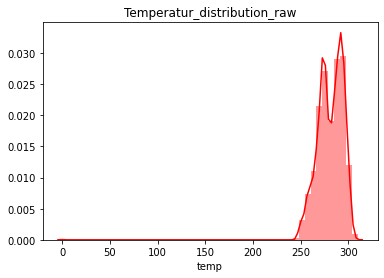

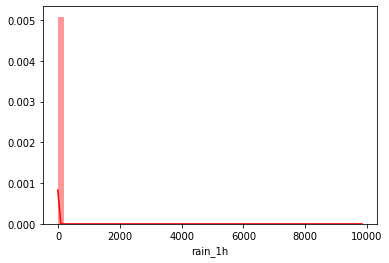

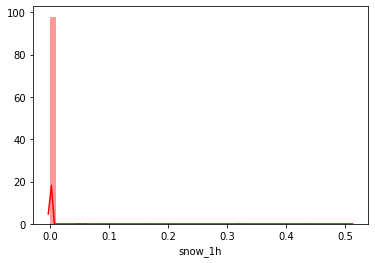

In [79]:
sns.distplot(df_raw["temp"], color="red")
name = "temp"
plt.title("Temperatur_distribution_raw")
plt.savefig("out/prep/raw_dist_"+ name +".png")
plt.show()
sns.distplot(df_raw["rain_1h"], color="red")
name = "rain_1h"
plt.savefig("out/prep/raw_dist_"+ name +".png")
plt.show()
sns.distplot(df_raw["snow_1h"], color="red")
name = "snow_1h"
plt.savefig("out/prep/raw_dist_"+ name +".png")
plt.show()

## show the outliers

In [82]:
print("min Ttemperatur K: ",np.min(df_raw["temp"]),"mean Ttemperatur K: ",np.mean(df_raw["temp"]))
print("max rain: ",np.max(df_raw["rain_1h"]),"mean rain: ",np.mean(df_raw["rain_1h"]))
print("max snow: ",np.max(df_raw["snow_1h"]),"max snow: ",np.min(df_raw["snow_1h"]))

min Ttemperatur K:  0.0 mean Ttemperatur K:  281.20953212305005
max rain:  9831.3 mean rain:  0.33460876970691483
max snow:  0.51 max snow:  0.0


## clean the dataset by dropping the rows with the outlires

In [83]:
indexNames = df_raw.index[df_raw.temp == np.min(df_raw["temp"])]
df_raw.drop(indexNames , inplace=True)

In [84]:
print("min Ttemperatur K: ",np.min(df_raw["temp"]),"mean Ttemperatur K: ",np.mean(df_raw["temp"]))
print("max rain: ",np.max(df_raw["rain_1h"]),"mean rain: ",np.mean(df_raw["rain_1h"]))
print("max snow: ",np.max(df_raw["snow_1h"]),"max snow: ",np.min(df_raw["snow_1h"]))

min Ttemperatur K:  243.39 mean Ttemperatur K:  281.2679555606341
max rain:  9831.3 mean rain:  0.33467828724575654
max snow:  0.51 max snow:  0.0


In [85]:
indexNames = df_raw.index[df_raw.rain_1h > 300]
df_raw.drop(indexNames , inplace=True)

In [86]:
print("min Ttemperatur K: ",np.min(df_raw["temp"]),"mean Ttemperatur K: ",np.mean(df_raw["temp"]))
print("max rain: ",np.max(df_raw["rain_1h"]),"mean rain: ",np.mean(df_raw["rain_1h"]))
print("max snow: ",np.max(df_raw["snow_1h"]),"max snow: ",np.min(df_raw["snow_1h"]))

min Ttemperatur K:  243.39 mean Ttemperatur K:  281.2675225421757
max rain:  55.63 mean rain:  0.13042819745699327
max snow:  0.51 max snow:  0.0


## looks much better

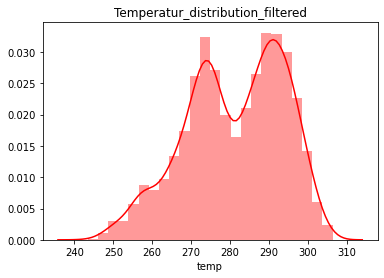

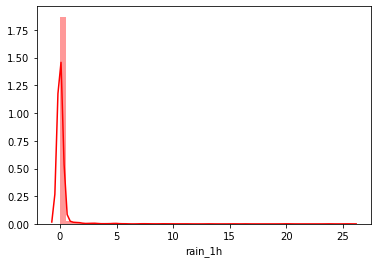

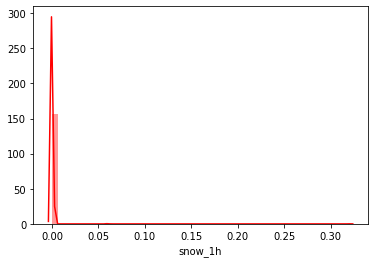

In [63]:
sns.distplot(df_raw["temp"], color="red")
name = "temp"
plt.title("Temperatur_distribution_filtered")
plt.savefig("out/prep/dist_"+ name +".png")
plt.show()
sns.distplot(df_raw["rain_1h"], color="red")
name = "rain_1h"
plt.savefig("out/prep/dist_"+ name +".png")
plt.show()
sns.distplot(df_raw["snow_1h"], color="red")
name = "snow_1h"
plt.savefig("out/prep/dist_"+ name +".png")
plt.show()

## converts the date coloum into a better fromat

In [64]:
df_raw["date_time"] = pd.to_datetime(df_raw.date_time)
df_raw["hour"] = df_raw.date_time.dt.hour
df_raw["day"] = df_raw.date_time.dt.day
df_raw["month"] = df_raw.date_time.dt.month
df_raw["year"] = df_raw.date_time.dt.year

df_raw = df_raw.drop("date_time", axis=1)

df_raw

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
46533        0  289.55     0.00      0.0          40         Mist   
32048        0  275.82     0.00      0.0          90       Clouds   
15267        0  294.83     0.00      0.0          90         Rain   
47061        0  292.14     1.78      0.0           5          Fog   
7630         0  297.96     0.00      0.0          48       Clouds   
...        ...     ...      ...      ...         ...          ...   
15186        0  287.82     0.00      0.0          90         Rain   
40839        0  276.08     0.00      0.0          90       Clouds   
28299        0  273.71     0.00      0.0           1        Clear   
1241         0  279.24     0.00      0.0           1        Clear   
23456        0  281.14     0.00      0.0           1        Clear   

      weather_description  traffic_volume  hour  day  month  year  
46533                mist            3119     5    8      8  2018  
32048     overcast clouds            4278    10   25      3  2017  
15267          light rain             483     5    6      7  2014  
47061                 fog            2713    22   25      8  2018  
7630     scattered clouds            3151    21   12      7  2013  
...                   ...             ...   ...  ...    ...   ...  
15186       moderate rain            1975    22    1      7  2014  
40839     overcast clouds            4261    15   21      1  2018  
28299        sky is clear             340     3   22     11  2016  
1241         sky is clear            2804    21   16     11  2012  
23456        sky is clear             287     2   19      5  2016  

[2994 rows x 12 columns]

## code the weather discription into numbers


In [24]:
lsitweather = df_raw.weather_main.unique()
l = 0
for j in lsitweather:
    df_raw = df_raw.replace(j,l)
    l = l + 1

lsitweather = df_raw.weather_description.unique()
l = 0
for j in lsitweather:
    df_raw = df_raw.replace(j,l)
    l = l + 1


In [25]:
df_raw

holiday     temp  rain_1h  snow_1h  clouds_all  weather_main  \
25966        0  293.170     1.02      0.0          75             0   
3238         0  272.240     0.00      0.0          90             1   
22171        0  276.760     0.00      0.0          40             1   
10561        0  257.860     0.00      0.0          64             2   
37789        0  287.880     0.00      0.0          90             3   
...        ...      ...      ...      ...         ...           ...   
27577        0  280.025     0.00      0.0          48             1   
43504        0  286.930     0.00      0.0          20             1   
22512        0  288.030     0.00      0.0          20             1   
27721        0  281.696     0.00      0.0          92             1   
19550        0  285.440     0.00      0.0          90             5   

       weather_description  traffic_volume  hour  day  month  year  
25966                    0             874    23   23      8  2016  
3238                     1            3121    19   30      1  2013  
22171                    2             731     0    1      4  2016  
10561                    3             257     2   10     12  2013  
37789                    4            5395    14    6     10  2017  
...                    ...             ...   ...  ...    ...   ...  
27577                    2            4881     9   25     10  2016  
43504                    7            4781    12   22      4  2018  
22512                    7            1180     6   17      4  2016  
27721                    1            4795     9   31     10  2016  
19550                    6            1826    22   17     11  2015  

[2994 rows x 12 columns]

# Prepare it for the training

In [26]:
#cols_to_drop = ['holiday', 'weather_main', 'weather_description']
#cols_to_drop = ['holiday', 'weather_main', 'weather_description']
#df_prep = df_raw.drop(cols_to_drop, axis=1)

In [27]:
df_prep = df_raw

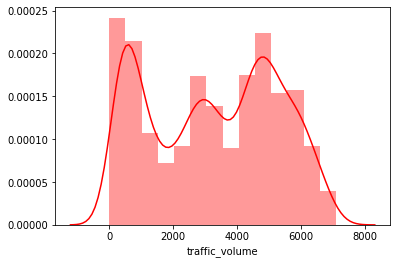

In [28]:
np.mean(df_prep["traffic_volume"])
plot = sns.distplot(df_prep["traffic_volume"], color="red")
name = "traffic"
plt.savefig("out/prep/raw_dist_"+ name +".png")

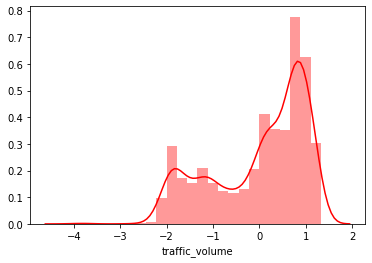

In [29]:
y = df_prep["traffic_volume"]
e = 0.21515151515151515
y_mean = y.apply(lambda x: (x**e)).mean()
transformed = y.apply(lambda x: (x**e)-y_mean)
sns.distplot(transformed,hist=True,color='red')
name = "traffic"
plt.savefig("out/prep/dist_"+ name +".png")
plt.show()

# Train and Test

In [30]:
Y = df_prep['traffic_volume']
Y = df_prep.traffic_volume
print(type(Y))
#Y = df_prep.traffic_volume
print(type(Y))
#Y = transformed
X = df_prep[["temp","rain_1h","snow_1h","clouds_all","hour","day","month","year","weather_main","weather_description"]]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


## SGD-Regression

In [ ]:
MODEL = SGDRegressor
NAME = "SGD"
PATH = "out/"+NAME+"/"
params = {"alpha" : [0.0001]}
n_splits = 10

modeltrainer = ModelTrainer(MODEL, params, X, Y)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_SGD = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

In [ ]:
plt.figure()
plt.grid()

title = "Learning_Curves_(SGD_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = SGDRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0, 0.25), cv=cv, n_jobs=4)
plt.savefig(PATH+title)
plt.show()

In [ ]:
MODEL = LinearRegression
params = {"alpha" : [0.00000001], "max_iter": [1000,10000], "weigths": ["residual"]}
n_splits = 10

modeltrainer = ModelTrainer(MODEL, params, X, Y)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
#score_list_SGD = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
#modeltrainer.train()
#res = modeltrainer.result
#display(res)

## KNN-Regression

In [ ]:
MODEL = KNeighborsRegressor
params = {"weights" : ["uniform"]}
NAME = "KNN"
PATH = "out/"+NAME+"/"
n_splits = 10

modeltrainer = ModelTrainer(MODEL, params, X, Y)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_KNN = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

In [ ]:
plt.figure()
plt.grid()

title = "Learning_Curves_(KNN_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = KNeighborsRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.5, 0.90), cv=cv, n_jobs=4)
plt.savefig(PATH+title)
plt.show()

In [ ]:
MODEL = KNNRegressor
params = {"n_neighbors" : [5],
           "p": [2]}#,
           #'weights': ['uniform']}
NAME = "KNN"
PATH = "out/"+NAME+"/"
n_splits = 10

modeltrainer = ModelTrainer(MODEL, params, X, Y)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_KNN_own = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

## RF-Regression

In [ ]:
MODEL = RandomForestRegressor
params = {"n_estimators" : [100]}
NAME = "RF"
PATH = "out/"+NAME+"/"
n_splits = 10

modeltrainer = ModelTrainer(MODEL, params, X, Y)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_RF = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

In [ ]:
plt.figure()
plt.grid()

title = "Learning_Curves_(RF_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.savefig(PATH+title)
plt.show()

## DT-Regression

In [ ]:
MODEL = DecisionTreeRegressor
params = {"criterion": ["mse"]}
NAME = "DT"
PATH = "out/"+NAME+"/"
n_splits = 10

modeltrainer = ModelTrainer(MODEL, params, X, Y)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_DT = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

In [ ]:
plt.figure()
plt.grid()

title = "Learning_Curves_(DT_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = DecisionTreeRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.6, 1.01), cv=cv, n_jobs=4)
plt.savefig(PATH+title)
plt.show()

In [ ]:
plot_learning_curve_own(score_list_SGD,"SGD", ylim=(0, 0.85))
plot_learning_curve_own(score_list_KNN,"KNN")
plot_learning_curve_own(score_list_RF,"RF")
plot_learning_curve_own(score_list_DT,"DT")
plt.savefig("out/shuffle_vs_score")

In [ ]:
#plot_learning_curve_own(score_list_SGD_own,"SGD_own", ylim=(0.2, 1.01))
plot_learning_curve_own(score_list_KNN_own,"KNN_own")
plt.savefig("out/shuffle_own_vs_score")